In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_discret = pd.read_excel('C:\\Users\\Hp\\Desktop\\Buildig-Data.xlsx')
df_discret.head()

,Permit Number,Permit Type,Permit Creation Date,Description,Current Status,Current Status Date,Filed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,...,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Record ID
0,201505065519,4,2015-05-06,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,6.0,6.0,...,4000.0,4000.0,tourist hotel/motel,143.0,Unknown,0,2.0,3,0,1380611233945
1,201604195146,4,2016-04-19,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,7.0,7.0,...,1.0,500.0,tourist hotel/motel,0.0,Unknown,0,2.0,3,0,1420164406718
2,201605278609,3,2016-05-27,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,6.0,6.0,...,20000.0,20000.0,retail sales,39.0,retail sales,39,2.0,1,1,1424856504716
3,201611072166,8,2016-11-07,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2.0,2.0,...,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1,2.0,5,5,1443574295566
4,201611283529,6,2016-11-28,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-11-20,3.0,3.0,...,100000.0,100000.0,retail sales,0.0,Unknown,0,2.0,3,0,144548169992


In [3]:
# This code checks for missing values and summarizes the dataset for further analysis.
missing_values = df_discret.isnull().sum()
summary_stats = df_discret.describe(include='all')
print('Missing Values:')
print(missing_values)
print('\
Summary Statistics:')
print(summary_stats)

Missing Values:
Permit Number                           0
Permit Type                             0
Permit Creation Date                    0
Description                             0
Current Status                          0
Current Status Date                     0
Filed Date                              0
First Construction Document Date    14913
Number of Existing Stories              0
Number of Proposed Stories              0
Permit Expiration Date              14919
Estimated Cost                          0
Revised Cost                            0
Existing Use                            0
Existing Units                          0
Proposed Use                            0
Proposed Units                          0
Plansets                                0
Existing Construction Type              0
Proposed Construction Type              0
Record ID                               0
dtype: int64
Summary Statistics:
       Permit Number    Permit Type           Permit Creation Date  \

In [4]:
# Set the style for the plots
sns.set(style='whitegrid')


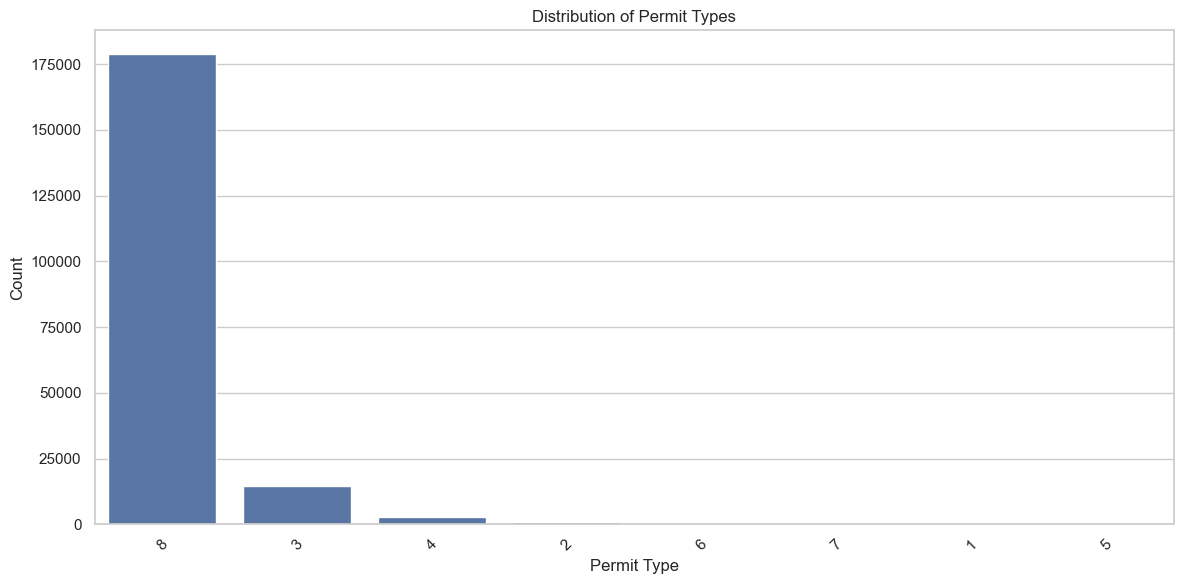

In [5]:
# Visualize the distribution of Permit Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df_discret, x='Permit Type', order=df_discret['Permit Type'].value_counts().index)
plt.title('Distribution of Permit Types')
plt.xticks(rotation=45)
plt.xlabel('Permit Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('permit_type_distribution.png')
plt.show()

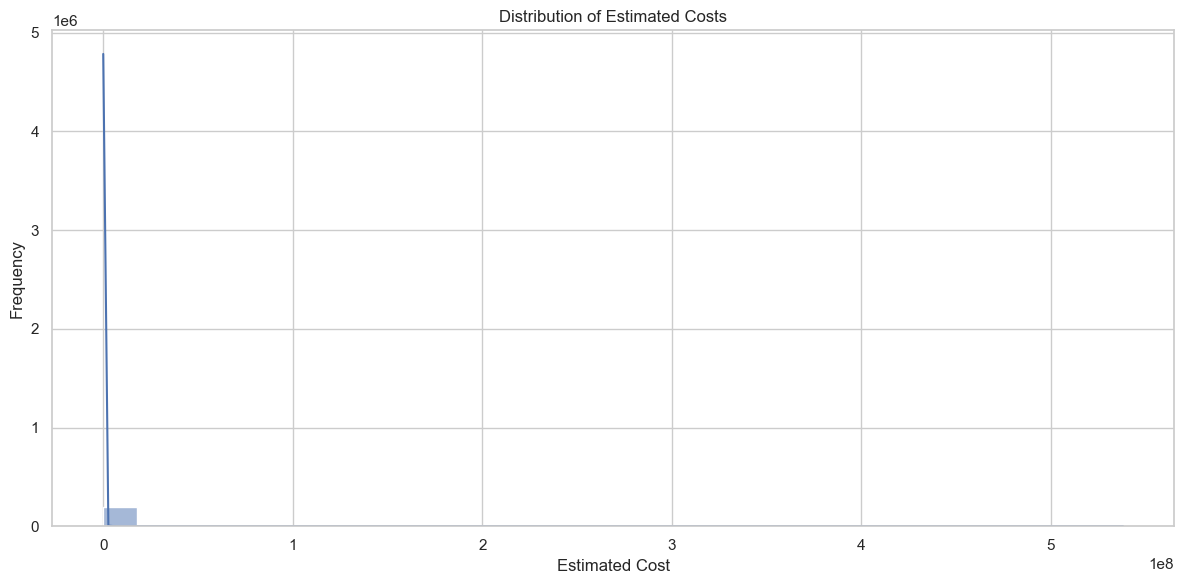

In [6]:
# Visualize the distribution of Estimated Costs
plt.figure(figsize=(12, 6))
sns.histplot(df_discret['Estimated Cost'].dropna(), bins=30, kde=True)
plt.title('Distribution of Estimated Costs')
plt.xlabel('Estimated Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('estimated_cost_distribution.png')
plt.show()

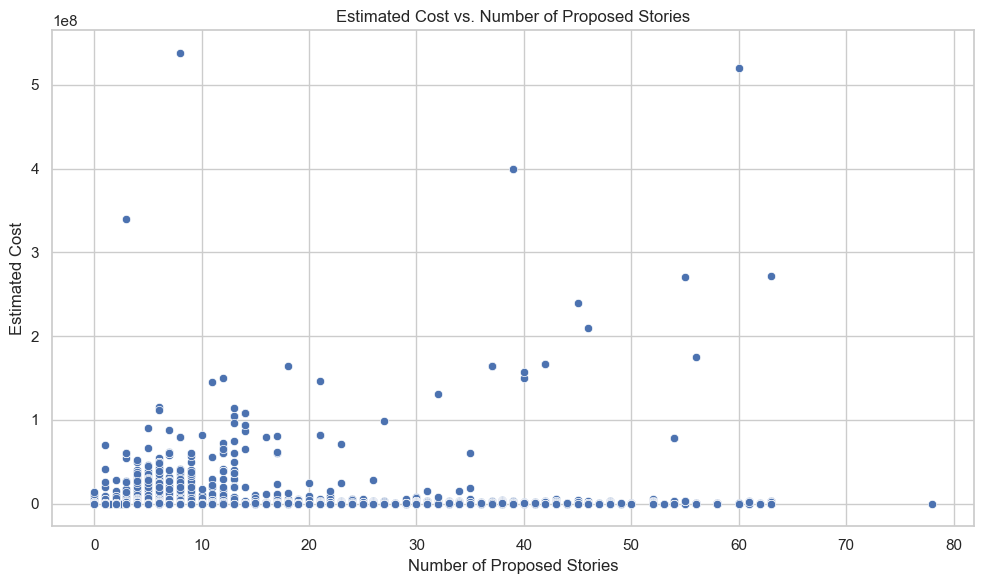

In [7]:
# This code analyzes the correlation between Estimated Cost and Number of Proposed Stories.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_discret, x='Number of Proposed Stories', y='Estimated Cost')
plt.title('Estimated Cost vs. Number of Proposed Stories')
plt.xlabel('Number of Proposed Stories')
plt.ylabel('Estimated Cost')
plt.tight_layout()
plt.savefig('cost_vs_proposed_stories.png')
plt.show()

In [8]:
# This code checks the data types of the columns in the dataframe.
column_types = df_discret.dtypes
print(column_types)

Permit Number                               object
Permit Type                                  int64
Permit Creation Date                datetime64[ns]
Description                                 object
Current Status                              object
Current Status Date                 datetime64[ns]
Filed Date                          datetime64[ns]
First Construction Document Date    datetime64[ns]
Number of Existing Stories                 float64
Number of Proposed Stories                 float64
Permit Expiration Date              datetime64[ns]
Estimated Cost                             float64
Revised Cost                               float64
Existing Use                                object
Existing Units                             float64
Proposed Use                                object
Proposed Units                               int64
Plansets                                   float64
Existing Construction Type                   int64
Proposed Construction Type     

In [9]:
# This code cleans the Estimated Cost and Number of Proposed Stories columns by converting them to numeric types.
df_discret['Estimated Cost'] = pd.to_numeric(df_discret['Estimated Cost'], errors='coerce')
df_discret['Number of Proposed Stories'] = pd.to_numeric(df_discret['Number of Proposed Stories'], errors='coerce')

# After cleaning, check for any remaining missing values in these columns.
missing_after_cleaning = df_discret[['Estimated Cost', 'Number of Proposed Stories']].isnull().sum()
print('Missing Values After Cleaning:')
print(missing_after_cleaning)

Missing Values After Cleaning:
Estimated Cost                0
Number of Proposed Stories    0
dtype: int64


In [10]:
# This code checks the unique values in the Estimated Cost and Number of Proposed Stories columns to identify non-numeric entries.
unique_estimated_costs = df_discret['Estimated Cost'].unique()
unique_proposed_stories = df_discret['Number of Proposed Stories'].unique()

print('Unique Values in Estimated Cost:')
print(unique_estimated_costs)

print('\
Unique Values in Number of Proposed Stories:')
print(unique_proposed_stories)

Unique Values in Estimated Cost:
[4.000000e+03 1.000000e+00 2.000000e+04 ... 1.289100e+04 2.209020e+05
 1.845312e+04]
Unique Values in Number of Proposed Stories:
[ 6.   7.   2.   3.   5.   0.   4.   1.  15.  23.  11.  13.  22.  21.
 17.  16.  26.   8.   9.  34.  20.  24.  48.  25.  19.  12.  14.  30.
 53.  52.  18.  37.  38.  31.  36.  32.  39.  40.  10.  43.  33.  50.
 55.  42.  60.  58.  29.  35.  45.  28.  63.  27.  62.  41.  47.  46.
 54.  61.  44.  49.  78.  56.   2.5  1.5]


In [11]:
# This code checks for non-numeric values across all columns in the dataframe.
non_numeric_entries = df_discret.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
non_numeric_columns = non_numeric_entries[non_numeric_entries > 0]

print('Columns with Non-Numeric Entries:')
print(non_numeric_columns)

Columns with Non-Numeric Entries:
Permit Number      37263
Description       198891
Current Status    198895
Existing Use      198895
Proposed Use      198895
dtype: int64


In [12]:
# This code filters the dataframe to include only numeric columns and then calculates the correlation matrix.
numeric_df = df_discret.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                            Permit Type  Number of Existing Stories  \
Permit Type                    1.000000                    0.030183   
Number of Existing Stories     0.030183                    1.000000   
Number of Proposed Stories     0.004538                    0.983631   
Estimated Cost                -0.122108                   -0.001218   
Revised Cost                  -0.122333                   -0.001560   
Existing Units                -0.005220                    0.274869   
Proposed Units                -0.015593                    0.257535   
Plansets                      -0.320925                    0.316789   
Existing Construction Type    -0.053193                   -0.188741   
Proposed Construction Type    -0.057974                   -0.203557   
Record ID                     -0.015720                   -0.116298   

                            Number of Proposed Stories  Estimated Cost  \
Permit Type                                   0.004538       -0.122108   

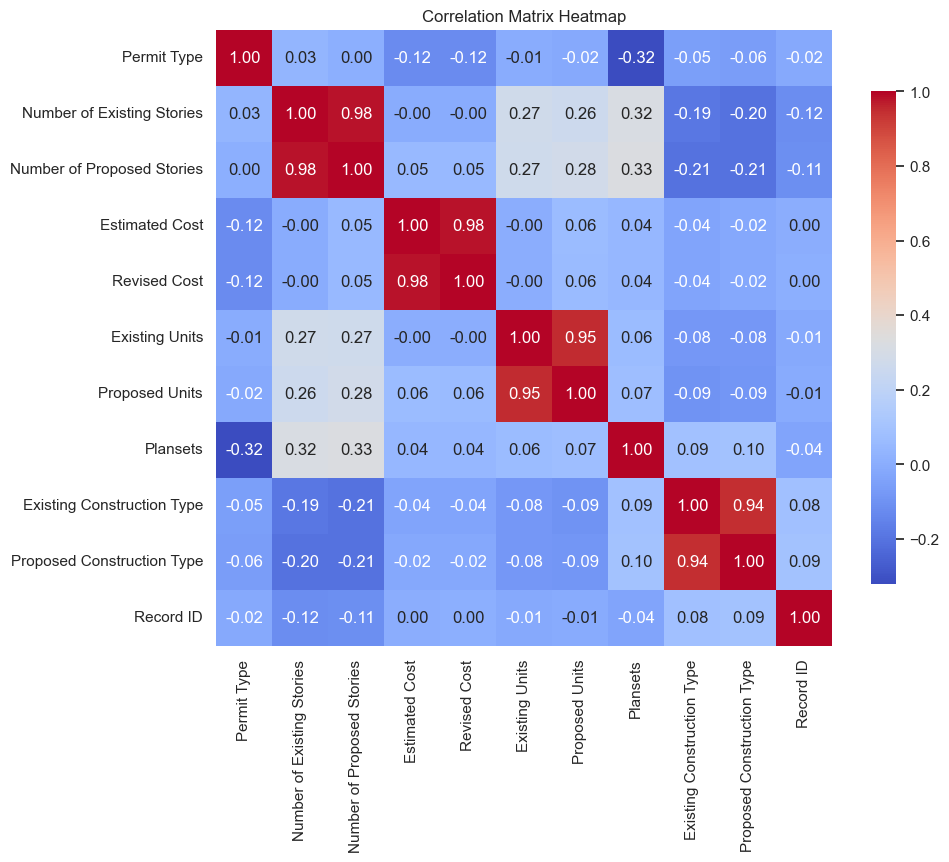

In [13]:
# This code visualizes the correlation matrix using a heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix Heatmap')
plt.show()